<a href="https://colab.research.google.com/github/ricardoricrob76/machinelearning/blob/main/Codigo_na_m%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Gerando Modelo de Machine Learning (Classificação)
# Preparação dos Dados e Treinamento do Modelo de Machine Learning - Par

In [21]:
#Conjunto de importacoes
import numpy as np  # Biblioteca de manipulação de valores vetor, matriz multidimensional.
import pandas as pd # Biblioteca de manipulação de dados equivalente ao (Excel).
import matplotlib.pyplot as plt # Biblioteca de visualização de dados 2D e 3D (Grafico pizza, barras).
from sklearn.naive_bayes import MultinomialNB # Biblioteca de ML com todos os Algoritmos.
from sklearn.naive_bayes import GaussianNB    # Biblioteca de ML com todos os Algoritmos.
from sklearn.metrics import accuracy_score     # Biblioteca de ML com todos os Algoritmos.
from sklearn.model_selection import train_test_split  # Biblioteca de ML com todos os Algoritmos.

In [4]:
#Carrega o dataset com os dados para o treinamento e validacao
dados_mamiferos_treino = pd.read_csv("dados_mamiferos_treino.csv", encoding="utf-8")

In [8]:
## visualização os dados mostra as 5 primeiras linhas do DataFrame.
dados_mamiferos_treino.head(10)

,ID,nome,sangue,bota_ovo,voa,mora_agua,classificacao
0,1,humano,1,2,2,2,1
1,2,cobra,2,1,2,2,0
2,3,baleia,1,2,2,1,1
3,4,sapo,1,1,2,3,0
4,5,morcego,1,2,1,2,1
5,6,pombo,1,1,1,2,0
6,7,gato,1,2,2,2,1
7,8,tartaruga,2,1,2,3,0
8,9,pinguim,1,1,2,3,0
9,10,porco-espinho,1,2,2,2,1


In [7]:
# Visualização as 5 últimas linhas.
dados_mamiferos_treino.tail()

,ID,nome,sangue,bota_ovo,voa,mora_agua,classificacao
11,12,salamandra,2,1,2,3,0
12,13,coruja,1,1,1,2,0
13,14,golfinho,1,2,2,1,1
14,15,águia,1,1,1,2,0
15,16,ornitorrinco,1,1,2,2,1


In [9]:
# Definição dos atributos que deverao ser treinados para gerar o modelo de classificacao
data_treino = np.array(dados_mamiferos_treino[['sangue', 'bota_ovo', 'voa', 'mora_agua']])

# Definição do atributo de classificacao
data_classif = np.array(dados_mamiferos_treino['classificacao'])

In [10]:
# Verificando o formato dos dados
dados_mamiferos_treino.shape

(16, 7)

In [11]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(dados_mamiferos_treino, size=10):
    corr = dados_mamiferos_treino.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns) 

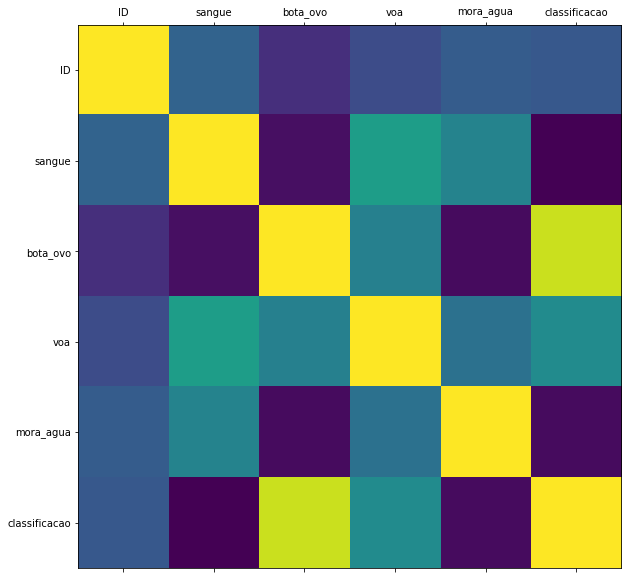

In [12]:
# Criando o gráfico
plot_corr(dados_mamiferos_treino)

In [13]:
# Spliting = 70% para dados de treino e 30% para dados de teste

In [14]:
#Definição dos conjuntos de treinamento e validação
x_treino, x_val, y_treino, y_val = train_test_split(data_treino, data_classif, test_size=0.35)

In [15]:
#Apresentacao dos dados selecionados para o conjunto de treinamento e validacao
print("-----------------------")
print("Conjunto de Treinamento")
print(x_treino)
print("Conjunto de Validacao")
print(x_val)
print("-----------------------")

-----------------------
Conjunto de Treinamento
[[2 1 2 3]
 [1 1 1 2]
 [1 1 2 3]
 [1 2 2 1]
 [1 2 1 2]
 [1 1 2 3]
 [2 1 2 2]
 [1 1 1 2]
 [1 2 2 2]
 [1 2 2 1]]
Conjunto de Validacao
[[1 2 2 2]
 [2 1 2 3]
 [1 1 2 2]
 [1 2 2 2]
 [2 1 2 1]
 [1 1 1 2]]
-----------------------


In [16]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(x_treino)/len(dados_mamiferos_treino.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(x_val)/len(dados_mamiferos_treino.index)) * 100))

62.50% nos dados de treino
37.50% nos dados de teste


In [17]:
#Treinamento do modelo com os dados atribuidos ao conjunto de treinamento
modelo_NB = GaussianNB()
modelo_NB.fit(x_treino, y_treino)

GaussianNB()

In [18]:
#Predição e acurácia para o conjunto de treinamento
print("Predicao para o conjunto de treinamento")
y_pred_treino = modelo_NB.predict(x_treino)
print("Acuracia para o conjunto de treinamento")
print(accuracy_score(y_treino, y_pred_treino))
print("Na Base de Treinamento")

Predicao para o conjunto de treinamento
Acuracia para o conjunto de treinamento
1.0
Na Base de Treinamento


In [24]:
from sklearn import metrics    # Biblioteca de ML com todos os Algoritmos.

In [25]:
# Criando uma Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_val, y_pred_val, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_val, y_pred_val, labels = [1, 0]))

Confusion Matrix
[[2 1]
 [0 3]]

Classification Report
              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           0       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



In [19]:
#Predição e acurácia para o conjunto de validação
print("Predicao para o conjunto de validacao")
y_pred_val = modelo_NB.predict(x_val)
print("Acuracia para o conjunto de validacao")
print(accuracy_score(y_val, y_pred_val))
print("na Base de Teste e ou Validação")

Predicao para o conjunto de validacao
Acuracia para o conjunto de validacao
0.8333333333333334
na Base de Teste e ou Validação
